# **Sobre o conjunto de dados** <p>
"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão. O termo foi popularizado pela primeira vez pela capitalista de risco Aileen Lee, fundadora da Cowboy Ventures, um fundo de capital de risco com sede em Palo Alto, Califórnia.

Unicórnios também podem se referir a um fenômeno de recrutamento no setor de recursos humanos (RH). Os gerentes de RH podem ter grandes expectativas para preencher um cargo, levando-os a procurar candidatos com qualificações superiores às exigidas para um cargo específico. Em essência, esses gerentes estão procurando um unicórnio, o que leva a uma desconexão entre seu candidato ideal e quem eles podem contratar do grupo de pessoas disponíveis.

[Download da base de dados](https://www.kaggle.com/ramjasmaurya/unicorn-startups)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
base_dados = pd.read_csv('/home/cassio/Documentos/Analise de Dados Python/Projetos_curso/Projeto_1/Startups+in+2021+end.csv')

In [3]:
base_dados.shape

(936, 8)

In [4]:
base_dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [5]:
base_dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [6]:
# Renomeação
base_dados.rename(columns={'Unnamed: 0' : 'Id', 'Company' : 'Empresa', 'Valuation ($B)': 'Valor ($)', 'Date Joined' : 'Data de Adesão', 'Country' : 'País',
       'City' : 'Cidade', 'Industry' : 'Setor', 'Select Investors': 'Investidores'}, inplace=True)

In [7]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   País            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


### Limpeza de Dados

In [8]:
# Modelando a coluna Valor ($)
base_dados['Valor ($)'] = pd.to_numeric(base_dados['Valor ($)'].apply(lambda x: x.replace('$', '')))

In [9]:
# Conversão data
base_dados['Data de Adesão'] = pd.to_datetime(base_dados['Data de Adesão'])

In [10]:
# criando as colunas mês e ano
base_dados['Mês'] = pd.DatetimeIndex(base_dados['Data de Adesão']).month
base_dados['Ano'] = pd.DatetimeIndex(base_dados['Data de Adesão']).year

base_dados.head()

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores,Mês,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [11]:
base_dados[['Investidor_1', 'Investidor_2', 'Investidor_3', 'Investidor_4']] = base_dados['Investidores'].str.split(',', expand=True)

In [12]:
base_dados.drop(columns='Investidores', inplace=True)

In [13]:
base_dados

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Mês,Ano,Investidor_1,Investidor_2,Investidor_3,Investidor_4
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,4,2017,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,12,2012,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,1,2014,Khosla Ventures,LowercaseCapital,capitalG,None
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,12,2011,Institutional Venture Partners,Sequoia Capital,General Atlantic,None
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,1,2018,Sequoia Capital China,Blackbird Ventures,Matrix Partners,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,931,YipitData,1.0,2021-12-06,United States,New York,Internet software & services,12,2021,RRE Ventures+,Highland Capital Partners,The Carlyle Group,None
932,932,Anyscale,1.0,2021-12-07,United States,Berkeley,Artificial Intelligence,12,2021,Andreessen Horowitz,Intel Capital,Foundation Capital,None
933,933,Iodine Software,1.0,2021-12-01,United States,Austin,Data management & analytics,12,2021,Advent International,Bain Capital Ventures,Silversmith Capital Partners,None
934,934,ReliaQuest,1.0,2021-12-01,United States,Tampa,Cybersecurity,12,2021,KKR,FTV Capital,Ten Eleven Ventures,None


In [14]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              936 non-null    int64         
 1   Empresa         936 non-null    object        
 2   Valor ($)       936 non-null    float64       
 3   Data de Adesão  936 non-null    datetime64[ns]
 4   País            936 non-null    object        
 5   Cidade          921 non-null    object        
 6   Setor           936 non-null    object        
 7   Mês             936 non-null    int32         
 8   Ano             936 non-null    int32         
 9   Investidor_1    935 non-null    object        
 10  Investidor_2    891 non-null    object        
 11  Investidor_3    810 non-null    object        
 12  Investidor_4    10 non-null     object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(8)
memory usage: 87.9+ KB


In [15]:
# valores nulos
base_dados.isnull().sum()

Id                  0
Empresa             0
Valor ($)           0
Data de Adesão      0
País                0
Cidade             15
Setor               0
Mês                 0
Ano                 0
Investidor_1        1
Investidor_2       45
Investidor_3      126
Investidor_4      926
dtype: int64

In [16]:
base_dados[base_dados.isnull().T.any()]

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Mês,Ano,Investidor_1,Investidor_2,Investidor_3,Investidor_4
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,12,2012,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,1,2014,Khosla Ventures,LowercaseCapital,capitalG,None
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,12,2011,Institutional Venture Partners,Sequoia Capital,General Atlantic,None
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,1,2018,Sequoia Capital China,Blackbird Ventures,Matrix Partners,None
5,5,Instacart,39.0,2014-12-30,United States,San Francisco,"Supply chain, logistics, & delivery",12,2014,Khosla Ventures,Kleiner Perkins Caufield & Byers,Collaborative Fund,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,931,YipitData,1.0,2021-12-06,United States,New York,Internet software & services,12,2021,RRE Ventures+,Highland Capital Partners,The Carlyle Group,None
932,932,Anyscale,1.0,2021-12-07,United States,Berkeley,Artificial Intelligence,12,2021,Andreessen Horowitz,Intel Capital,Foundation Capital,None
933,933,Iodine Software,1.0,2021-12-01,United States,Austin,Data management & analytics,12,2021,Advent International,Bain Capital Ventures,Silversmith Capital Partners,None
934,934,ReliaQuest,1.0,2021-12-01,United States,Tampa,Cybersecurity,12,2021,KKR,FTV Capital,Ten Eleven Ventures,None


In [17]:
base_dados.isnull().sum()

Id                  0
Empresa             0
Valor ($)           0
Data de Adesão      0
País                0
Cidade             15
Setor               0
Mês                 0
Ano                 0
Investidor_1        1
Investidor_2       45
Investidor_3      126
Investidor_4      926
dtype: int64

In [18]:
base_dados

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Mês,Ano,Investidor_1,Investidor_2,Investidor_3,Investidor_4
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,4,2017,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,12,2012,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,1,2014,Khosla Ventures,LowercaseCapital,capitalG,None
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,12,2011,Institutional Venture Partners,Sequoia Capital,General Atlantic,None
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,1,2018,Sequoia Capital China,Blackbird Ventures,Matrix Partners,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,931,YipitData,1.0,2021-12-06,United States,New York,Internet software & services,12,2021,RRE Ventures+,Highland Capital Partners,The Carlyle Group,None
932,932,Anyscale,1.0,2021-12-07,United States,Berkeley,Artificial Intelligence,12,2021,Andreessen Horowitz,Intel Capital,Foundation Capital,None
933,933,Iodine Software,1.0,2021-12-01,United States,Austin,Data management & analytics,12,2021,Advent International,Bain Capital Ventures,Silversmith Capital Partners,None
934,934,ReliaQuest,1.0,2021-12-01,United States,Tampa,Cybersecurity,12,2021,KKR,FTV Capital,Ten Eleven Ventures,None


In [19]:
base_dados[base_dados.isnull().T.any()]

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Mês,Ano,Investidor_1,Investidor_2,Investidor_3,Investidor_4
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,12,2012,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,1,2014,Khosla Ventures,LowercaseCapital,capitalG,None
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,12,2011,Institutional Venture Partners,Sequoia Capital,General Atlantic,None
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,1,2018,Sequoia Capital China,Blackbird Ventures,Matrix Partners,None
5,5,Instacart,39.0,2014-12-30,United States,San Francisco,"Supply chain, logistics, & delivery",12,2014,Khosla Ventures,Kleiner Perkins Caufield & Byers,Collaborative Fund,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,931,YipitData,1.0,2021-12-06,United States,New York,Internet software & services,12,2021,RRE Ventures+,Highland Capital Partners,The Carlyle Group,None
932,932,Anyscale,1.0,2021-12-07,United States,Berkeley,Artificial Intelligence,12,2021,Andreessen Horowitz,Intel Capital,Foundation Capital,None
933,933,Iodine Software,1.0,2021-12-01,United States,Austin,Data management & analytics,12,2021,Advent International,Bain Capital Ventures,Silversmith Capital Partners,None
934,934,ReliaQuest,1.0,2021-12-01,United States,Tampa,Cybersecurity,12,2021,KKR,FTV Capital,Ten Eleven Ventures,None


In [20]:
# campos unicos
base_dados.nunique()

Id                936
Empresa           935
Valor ($)         192
Data de Adesão    589
País               47
Cidade            239
Setor              17
Mês                12
Ano                13
Investidor_1      506
Investidor_2      532
Investidor_3      506
Investidor_4       10
dtype: int64

#### Data visualization

In [21]:
base_dados.groupby('Setor')[['Investidor_1', 'Investidor_2', 'Investidor_3', 'Investidor_4']].count()

,Investidor_1,Investidor_2,Investidor_3,Investidor_4
Setor,,,,
Artificial Intelligence,4,4,4,0
Artificial intelligence,69,64,58,3
Auto & transportation,29,28,24,1
Consumer & retail,23,20,15,0
Cybersecurity,41,41,40,0
Data management & analytics,36,36,33,0
E-commerce & direct-to-consumer,102,98,91,0
Edtech,27,26,26,0
Fintech,190,183,173,0


In [22]:
base_dados.loc[base_dados['Setor'] == 'Artificial intelligence', 'Setor'] = 'Artificial Intelligence'
base_dados.loc[base_dados['Setor'] == 'Finttech', 'Setor'] = 'Fintech'

In [23]:
agrupado = base_dados.groupby('Setor')[['Investidor_1', 'Investidor_2', 'Investidor_3', 'Investidor_4']].count()
agrupado

,Investidor_1,Investidor_2,Investidor_3,Investidor_4
Setor,,,,
Artificial Intelligence,73,68,62,3
Auto & transportation,29,28,24,1
Consumer & retail,23,20,15,0
Cybersecurity,41,41,40,0
Data management & analytics,36,36,33,0
E-commerce & direct-to-consumer,102,98,91,0
Edtech,27,26,26,0
Fintech,191,184,174,0
Hardware,32,32,26,0


In [24]:
agrupado['Total_Investidors'] = agrupado[['Investidor_1', 'Investidor_2', 'Investidor_3', 'Investidor_4']].sum(axis=1)
agrupado.drop(columns=['Investidor_1', 'Investidor_2', 'Investidor_3', 'Investidor_4'], inplace=True)
agrupado1 = agrupado.sort_values(by= 'Total_Investidors', ascending=False)
agrupado1

,Total_Investidors
Setor,
Fintech,549
Internet software & services,479
E-commerce & direct-to-consumer,291
Artificial Intelligence,206
Health,178
"Supply chain, logistics, & delivery",149
Other,125
Cybersecurity,122
Data management & analytics,105


In [25]:
# valores unicos do Setor (%)
agrupado = round(base_dados['Setor'].value_counts(normalize=True) * 100, 2)
agrupado

Setor
Fintech                                20.41
Internet software & services           17.84
E-commerce & direct-to-consumer        10.90
Artificial Intelligence                 7.80
Health                                  6.73
Other                                   5.45
Supply chain, logistics, & delivery     5.45
Cybersecurity                           4.38
Mobile & telecommunications             3.95
Data management & analytics             3.85
Hardware                                3.42
Auto & transportation                   3.10
Edtech                                  2.88
Consumer & retail                       2.46
Travel                                  1.39
Name: proportion, dtype: float64

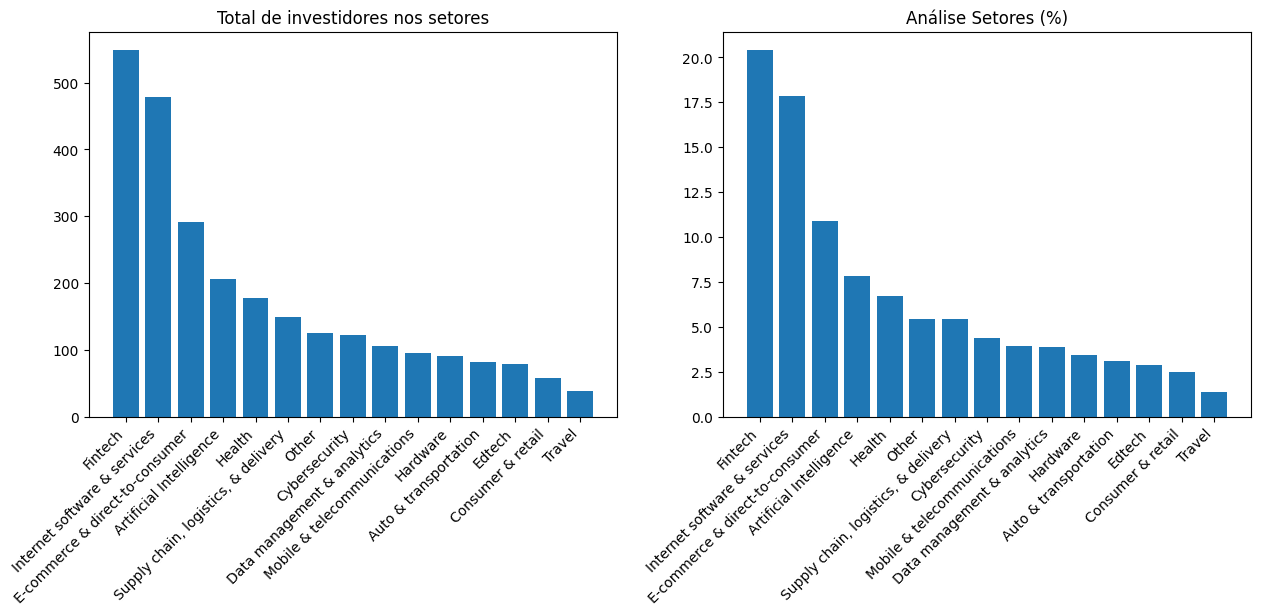

In [35]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Total de investidores nos setores')

plt.bar(agrupado1.index, agrupado1.Total_Investidors)
plt.xticks(rotation=45, ha='right')

plt.subplot(1,2,2)
plt.title('Análise Setores (%)')
plt.bar(agrupado.index, agrupado.values)
plt.xticks(rotation = 45, ha = 'right')

plt.show()

In [27]:
analise = round(base_dados['País'].value_counts(normalize=True)*100, 2)
analise = analise.head(10).copy()

In [28]:
analise

País
United States     50.96
China             18.06
India              5.45
United Kingdom     3.95
Germany            2.46
Israel             2.24
France             2.03
Canada             1.60
Brazil             1.60
South Korea        1.18
Name: proportion, dtype: float64

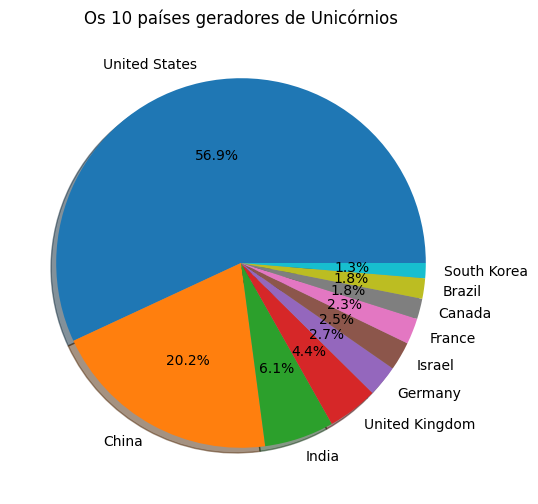

In [29]:
# Gerando gráfico de pizza dost top 10 países com fintech

plt.figure(figsize=(15,6))
plt.title('Os 10 países geradores de Unicórnios')
plt.pie(
    analise, 
    labels=analise.index,
    shadow=True,
    startangle=360,
    autopct='%1.1f%%'    
    )
plt.show()

In [30]:
# Tabela Analítica
agrupamento = base_dados.groupby(by=['País', 'Ano', 'Mês', 'Empresa']).count()['Id'].reset_index()

agrupamento

,País,Ano,Mês,Empresa,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [31]:
agrupamento.loc[agrupamento['País'] == 'Brazil']

,País,Ano,Mês,Empresa,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [32]:
agrupamento = base_dados.groupby(by=['País'])['Valor ($)'].sum().reset_index().sort_values('Valor ($)', ascending=False)

agrupamento

,País,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
38,Sweden,58.08
1,Australia,50.60
22,Israel,43.82
17,Hong Kong,41.45


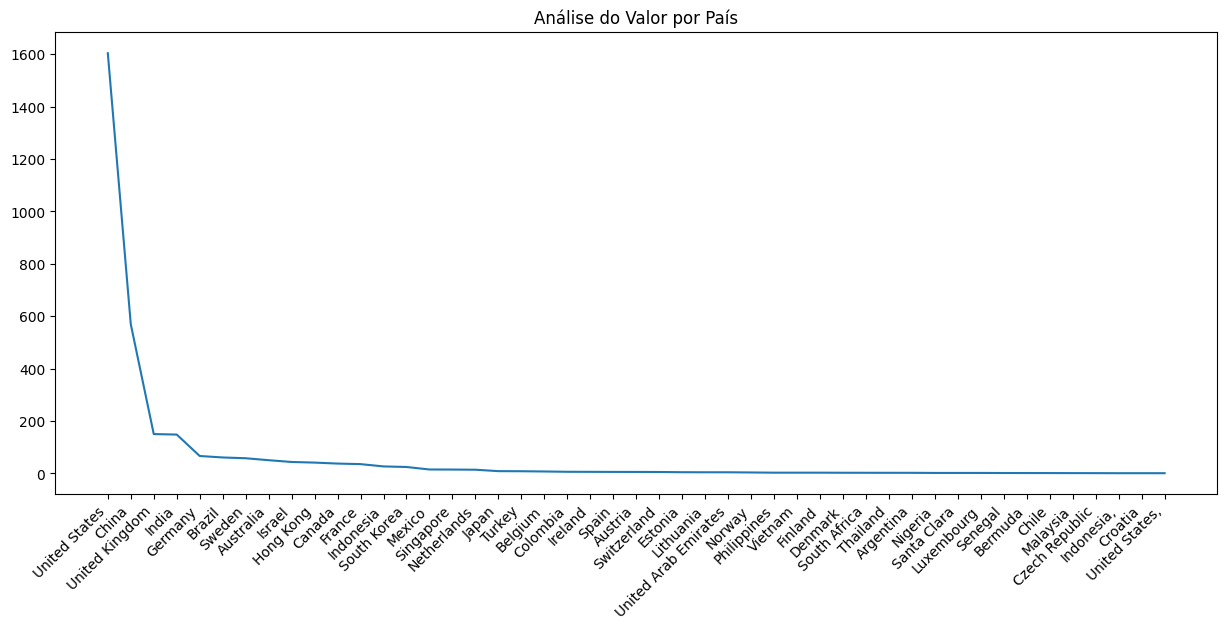

In [33]:
plt.figure(figsize=(15,6))
plt.title('Análise do Valor por País')
plt.plot(agrupamento['País'], agrupamento['Valor ($)'])
plt.xticks(rotation = 45, ha= 'right')
plt.show()